<a href="https://colab.research.google.com/github/VaideswarReddy/Company_classification/blob/main/Company_classification_Vaideswar_Reddy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing necessary libraries

import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Reading the data file
df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Cohort Nilgiri/ML Projects/Company classification/Copy of data_company_classification.csv')

In [ ]:
# Verifying
df.head()

website  ...                                   meta_description
0         bipelectric.com  ...  Providing quality, reliable full service resid...
1        eliasmedical.com  ...  For the best value in Bakersfield skin care tr...
2  koopsoverheaddoors.com  ...  Koops Overhead Doors specializes in the sales,...
3         midtowneyes.com  ...  We would like to welcome you to Midtown Eyecar...
4     reprosecurity.co.uk  ...  Repro Security provide a range of tailor made ...

[5 rows x 9 columns]

In [ ]:
# Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73974 entries, 0 to 73973
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   website           73974 non-null  object
 1   company_name      73974 non-null  object
 2   homepage_text     73305 non-null  object
 3   h1                46653 non-null  object
 4   h2                53212 non-null  object
 5   h3                44659 non-null  object
 6   nav_link_text     48050 non-null  object
 7   meta_keywords     23672 non-null  object
 8   meta_description  66886 non-null  object
dtypes: object(9)
memory usage: 5.1+ MB


In [ ]:
# Count of null values
df.isnull().sum()

website                 0
company_name            0
homepage_text         669
h1                  27321
h2                  20762
h3                  29315
nav_link_text       25924
meta_keywords       50302
meta_description     7088
dtype: int64

In [ ]:
# Checking
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73974 entries, 0 to 73973
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   website           73974 non-null  object
 1   company_name      73974 non-null  object
 2   homepage_text     73974 non-null  object
 3   h1                73974 non-null  object
 4   h2                73974 non-null  object
 5   h3                73974 non-null  object
 6   nav_link_text     73974 non-null  object
 7   meta_keywords     73974 non-null  object
 8   meta_description  73974 non-null  object
dtypes: object(9)
memory usage: 5.1+ MB


In [ ]:
# Subsetting of the data

df1 = df[['company_name','meta_keywords','meta_description']]

In [ ]:
# Merging two coulums
df1['text'] = df1['meta_keywords'] + df1['meta_description']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73974 entries, 0 to 73973
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   company_name      73974 non-null  object
 1   meta_keywords     23672 non-null  object
 2   meta_description  66886 non-null  object
 3   text              22610 non-null  object
dtypes: object(4)
memory usage: 2.3+ MB


In [ ]:
df2 = df1[~df1['text'].isnull()]

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22610 entries, 0 to 73970
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   company_name      22610 non-null  object
 1   meta_keywords     22610 non-null  object
 2   meta_description  22610 non-null  object
 3   text              22610 non-null  object
dtypes: object(4)
memory usage: 883.2+ KB


In [ ]:
df2.head()

company_name  ...                                               text
0          bip dipietro electric inc  ...  electricians vero beach, vero beach electrical...
1                      elias medical  ...  Elias Medical bakersfield ca family doctor med...
2               koops overhead doors  ...  Koops Overhead Doors, Albany Garage Doors, Tro...
5  wood green timber company limited  ...  wood, green, timberWood Green London Timber | ...
6                   houston chemical  ...  Chemicals, Drilling Fluids, Eco-Friendly, Envi...

[5 rows x 4 columns]

In [ ]:
df2.shape

(22610, 4)

In [ ]:
# Cleaning the data

# removing punctuations and Urls
def remove_urls_punctuations(text):
  text = re.sub(r"(?:\@|http?\://)\S+", "", text)
  text = re.sub(r"(?:\@|https?\://)\S+", "", text)
  text = re.sub(r"[^\w\s]", "", text)
  return text
# Removing stopwords

nltk.download('stopwords')
def remove_stopwords(text):
  filtered_words = [word for word in text.split() if word not in stopwords.words('english')]
  return ' '.join(filtered_words)

# Removing digits

def remove_digits(text):
  for word in text:
    return ''.join([i for i in text if not i.isdigit()])

# Lemmetization

nltk.download('wordnet')
wnl = WordNetLemmatizer()
def lemmitize_text(text):
  lem_words = []
  for words in text:
    lem_words.append(wnl.lemmatize(words))
  lem_sentence = ''
  for word in lem_words:
    lem_sentence +=  word

  return lem_sentence

def lem_text(text):
  l = [wnl.lemmatize(word) for word in text.split()]
  return " ".join(l)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
def clean_text(text):
  text1 = remove_urls_punctuations(text)
  text2 = remove_stopwords(text1)
  text3 = lem_text(text2)
  text4 = remove_digits(text3)
  
  return text4

In [ ]:
# Checking use case
df2['text'][9]

'UL Certified, brake metal, break metal fabrication, commercial sheet metal service, custom sheet metal fabrication, custom welding, gutter, gutter downspouts, residential sheet metalMetal Pride Inc. is a 50,000 square foot sheet metal fabrication facility located in Atlanta, GA.\xa0We offer Residential and Commercial sheet metal services.'

In [ ]:
# Checking use case
clean_text(df2['text'][9])

'UL Certified brake metal break metal fabrication commercial sheet metal service custom sheet metal fabrication custom welding gutter gutter downspouts residential sheet metalMetal Pride Inc  square foot sheet metal fabrication facility located Atlanta GA We offer Residential Commercial sheet metal service'

In [ ]:
df2['text'] = df2['text'].apply(clean_text)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df2.text.values

array(['electrician vero beach vero beach electrical contractor electric contractor electrical contractor lighting control lighting solution florida electrical business lighting electrical contract vero beach electric commercial lighting control electrician Indian River County Sebastian Ft PierceProviding quality reliable full service residential commercial electrical contractor service Vero Beach Fl Indian River County',
       'Elias Medical bakersfield ca family doctor medicine Juvederm skin care Botox laser hair removal acne treatment restylane age spot photofacialFor best value Bakersfield skin care treatment medical doctor well compassionate family medicine care visit Elias Medical Havent tried Botox Restylane Photofacial Juvederm yet Now chance',
       'Koops Overhead Doors Albany Garage Doors Troy Garage Doors Capital District Garage Doors Clifton Park Garage Doors Capital District Garage Door Repair Albany Garage Door RepairKoops Overhead Doors specializes sale service repair

In [ ]:
# Saving the cleaned data file
df2.to_csv('/content/drive/MyDrive/AlmaBetter/Cohort Nilgiri/ML Projects/Company classification/Cleaned__part_company_classification.csv')

In [2]:

df2 = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Cohort Nilgiri/ML Projects/Company classification/Cleaned__part_company_classification.csv',index_col=0)

# Vectorization

In [ ]:
df2.head()

company_name  ...                                               text
0          bip dipietro electric inc  ...  electrician vero beach vero beach electrical c...
1                      elias medical  ...  Elias Medical bakersfield ca family doctor med...
2               koops overhead doors  ...  Koops Overhead Doors Albany Garage Doors Troy ...
5  wood green timber company limited  ...  wood green timberWood Green London Timber Timb...
6                   houston chemical  ...  Chemicals Drilling Fluids EcoFriendly Environm...

[5 rows x 4 columns]

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22610 entries, 0 to 73970
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   company_name      22610 non-null  object
 1   meta_keywords     22610 non-null  object
 2   meta_description  22610 non-null  object
 3   text              22608 non-null  object
dtypes: object(4)
memory usage: 883.2+ KB


In [3]:
df2 = df2[~df2['text'].isnull()]

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22608 entries, 0 to 73970
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   company_name      22608 non-null  object
 1   meta_keywords     22608 non-null  object
 2   meta_description  22608 non-null  object
 3   text              22608 non-null  object
dtypes: object(4)
memory usage: 883.1+ KB


In [4]:
# creating vectorizer 
vectorizer = TfidfVectorizer(max_df=0.9, min_df=0.03)

In [5]:
X = vectorizer.fit_transform(df2['text'])

In [6]:
words_list = vectorizer.get_feature_names()

In [7]:
tf_idf = pd.DataFrame(data = X.toarray(), columns=vectorizer.get_feature_names())

In [8]:
tf_idf.head()

agency      area  based      best  business  ...   we  web  website  work  year
0     0.0  0.000000    0.0  0.000000  0.194974  ...  0.0  0.0      0.0   0.0   0.0
1     0.0  0.000000    0.0  0.184349  0.000000  ...  0.0  0.0      0.0   0.0   0.0
2     0.0  0.344581    0.0  0.000000  0.000000  ...  0.0  0.0      0.0   0.0   0.0
3     0.0  0.000000    0.0  0.000000  0.000000  ...  0.0  0.0      0.0   0.0   0.0
4     0.0  0.000000    0.0  0.000000  0.000000  ...  0.0  0.0      0.0   0.0   0.0

[5 rows x 98 columns]

In [ ]:
# first 10 words with highest weight on document
tf_idf.T.nlargest(5, 0)

0      1       2      3      ...  22604  22605  22606  22607
county       0.606610    0.0  0.0000    0.0  ...    0.0    0.0    0.0    0.0
commercial   0.458655    0.0  0.0000    0.0  ...    0.0    0.0    0.0    0.0
service      0.305866    0.0  0.1986    0.0  ...    0.0    0.0    0.0    0.0
residential  0.298087    0.0  0.0000    0.0  ...    0.0    0.0    0.0    0.0
full         0.291139    0.0  0.0000    0.0  ...    0.0    0.0    0.0    0.0

[5 rows x 22608 columns]

In [9]:
X.shape

(22608, 98)

In [ ]:
# X.shape

(22608, 110076)

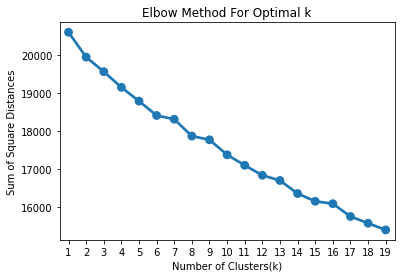

In [ ]:

from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,20):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.04645200045958926
For n_clusters = 3 The average silhouette_score is : 0.0436854809676941
For n_clusters = 4 The average silhouette_score is : 0.054136123329009016
For n_clusters = 5 The average silhouette_score is : 0.06092305690464549
For n_clusters = 6 The average silhouette_score is : 0.06675225043451406
For n_clusters = 7 The average silhouette_score is : 0.07178592102831134
For n_clusters = 8 The average silhouette_score is : 0.07992479797854747
For n_clusters = 9 The average silhouette_score is : 0.07928389001994038
For n_clusters = 10 The average silhouette_score is : 0.08427152134119865
For n_clusters = 11 The average silhouette_score is : 0.08980375869247084
For n_clusters = 12 The average silhouette_score is : 0.09506016268042851
For n_clusters = 13 The average silhouette_score is : 0.0996292667556727
For n_clusters = 14 The average silhouette_score is : 0.10490123503491149
For n_clusters = 15 The average silhouette_scor

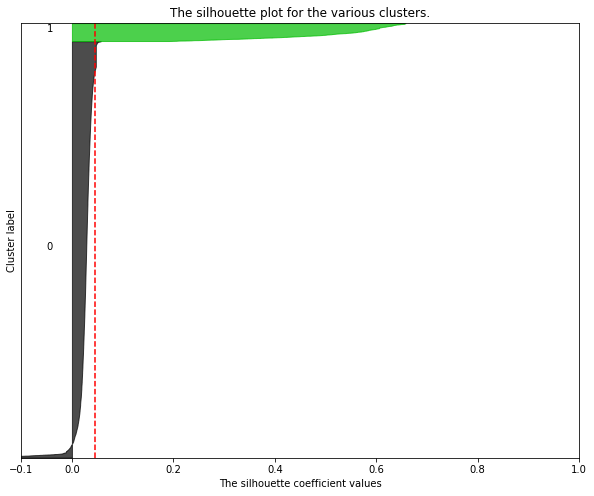

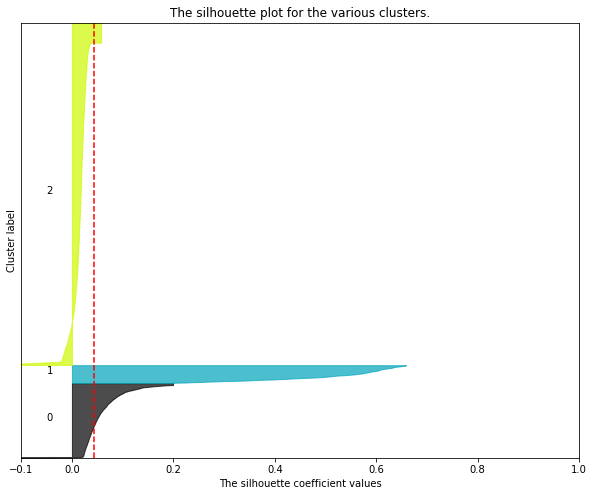

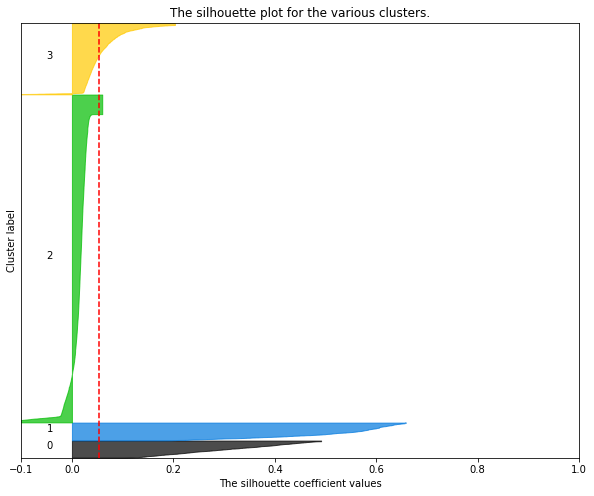

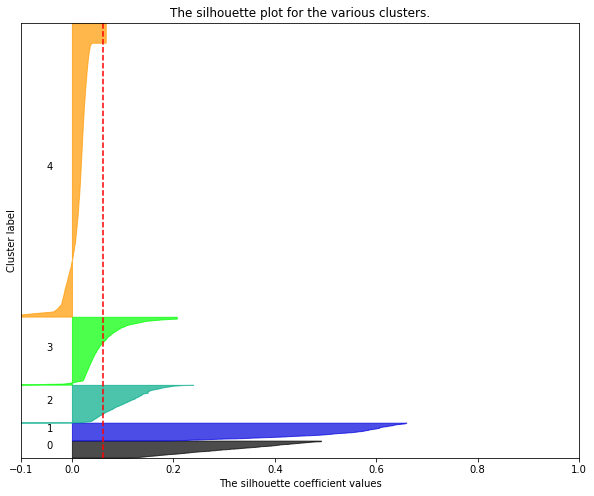

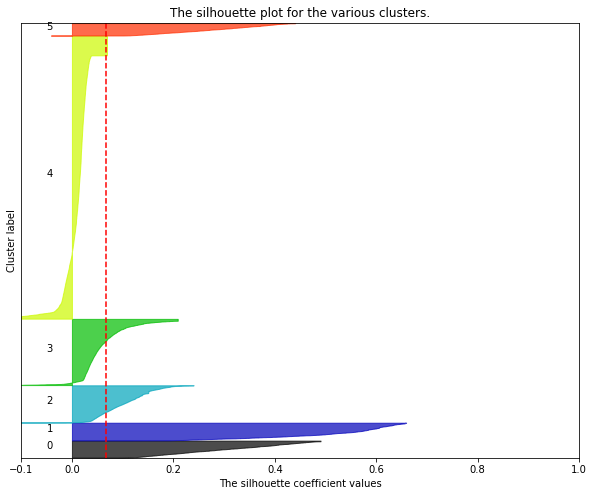

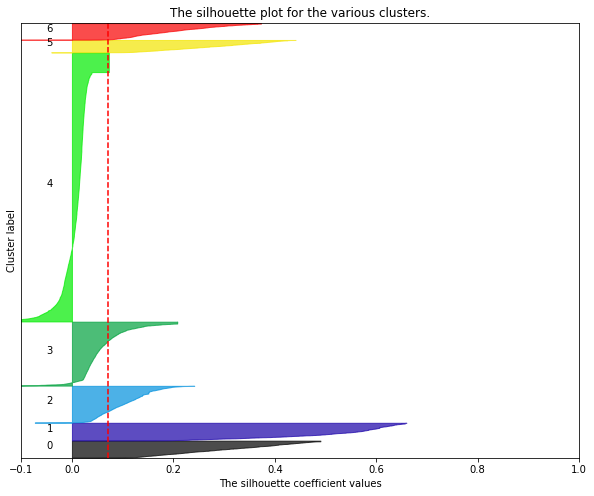

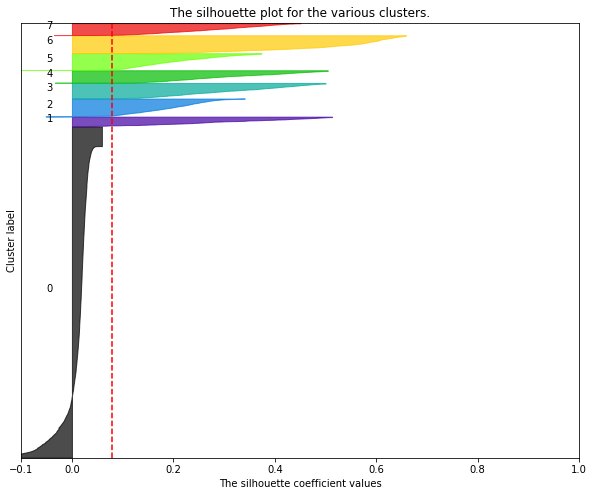

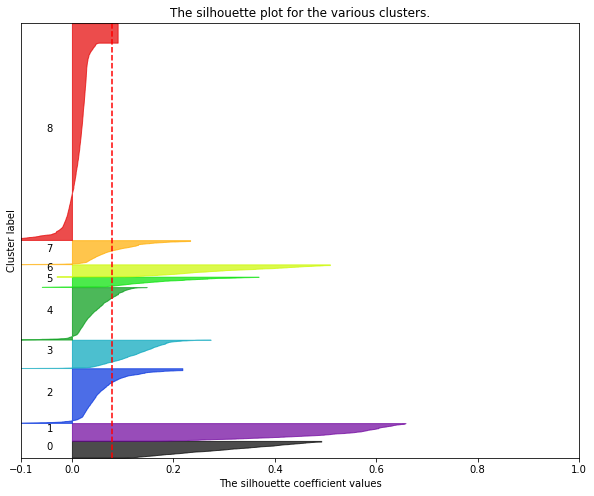

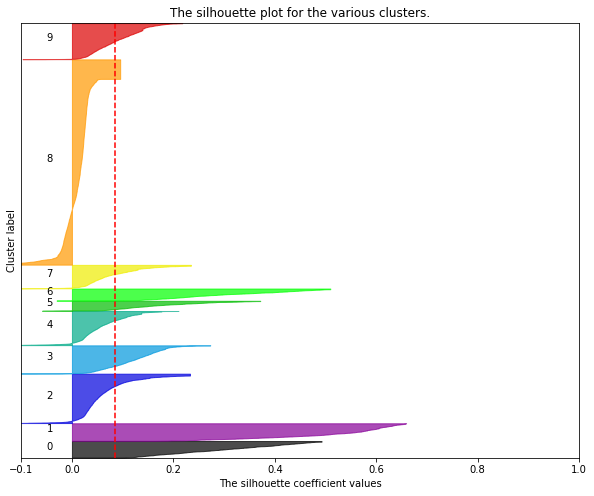

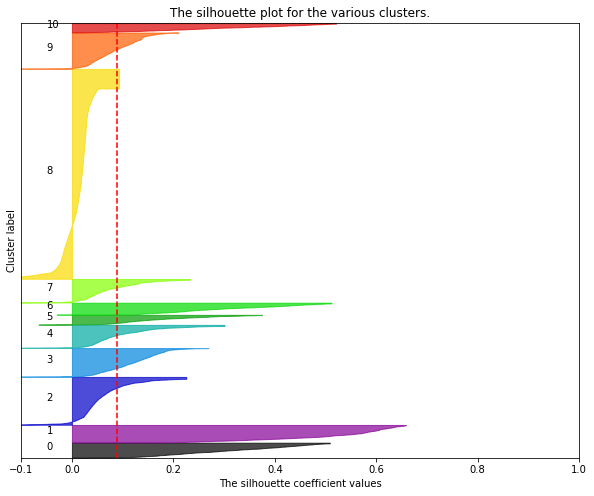

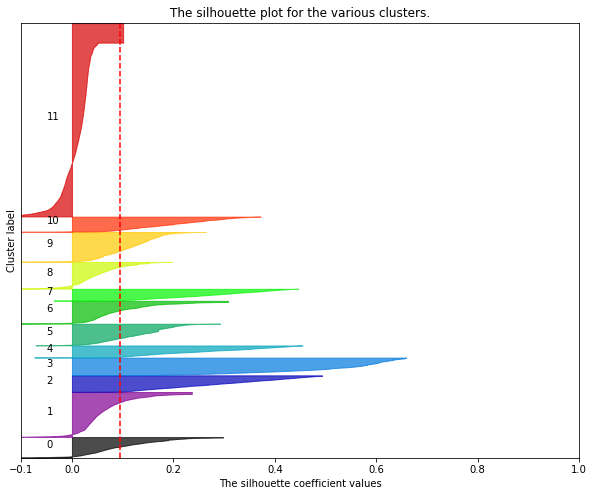

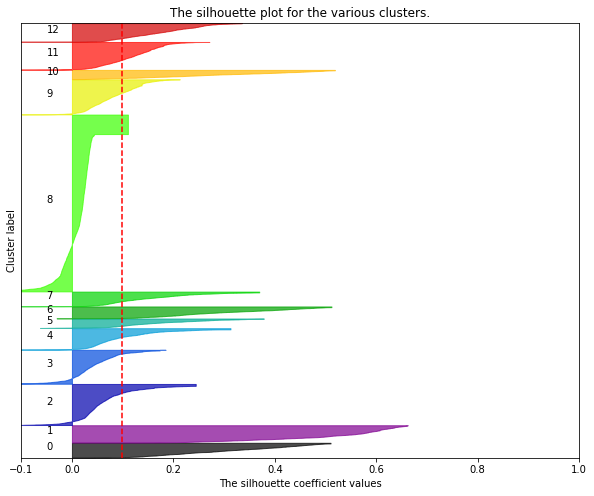

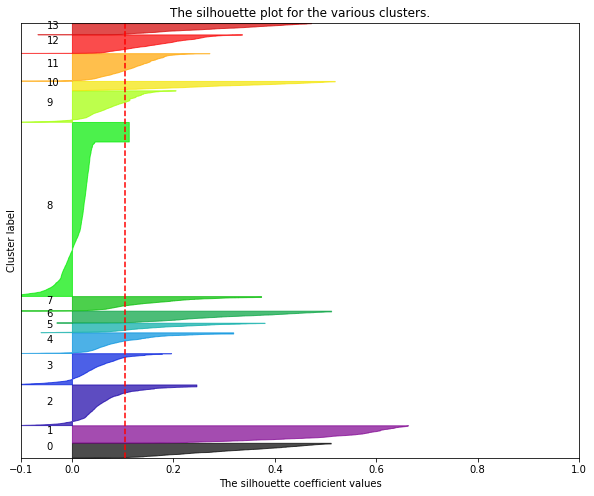

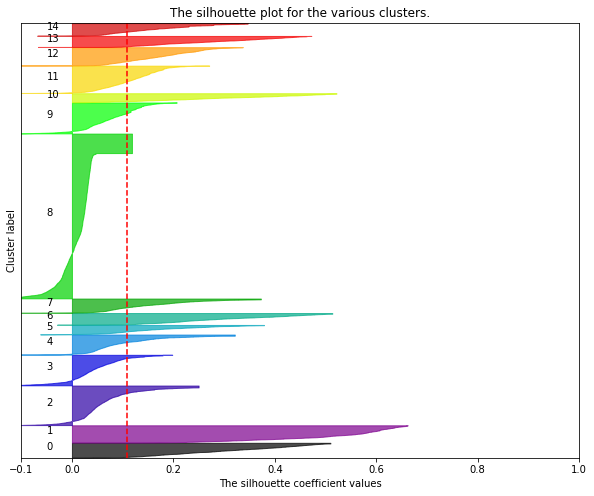

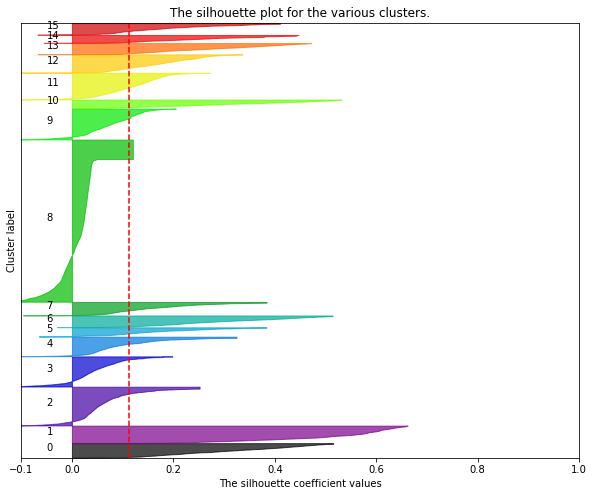

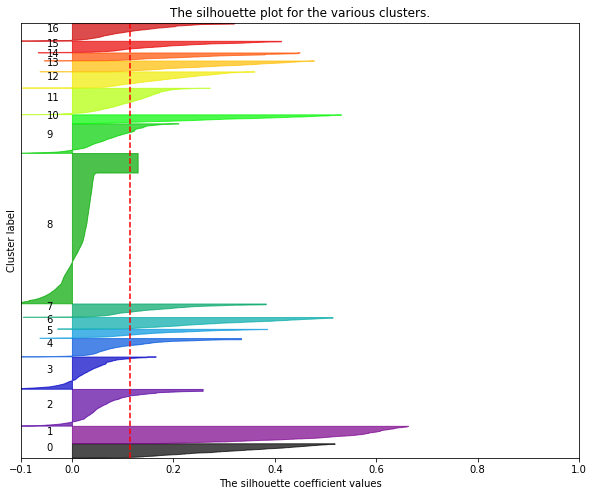

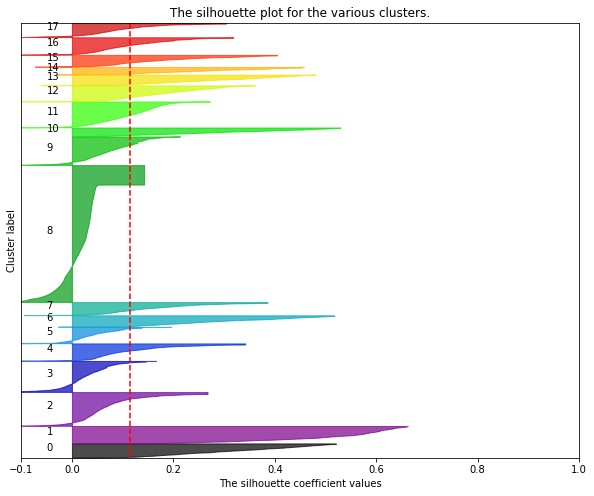

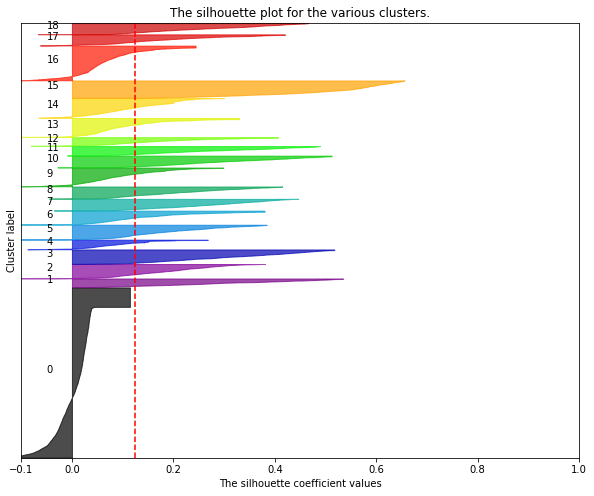

In [ ]:


from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = range(2,20)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1)
    fig.set_size_inches(10, 8)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, X.shape[0] + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

In [10]:
#Perform K-Mean Clustering or build the K-Means clustering model
KMean_clust = KMeans(n_clusters= 9, init= 'k-means++', max_iter= 1000)
KMean_clust.fit(X)

#Find the clusters for the observation given in the dataset
df2['Cluster'] = KMean_clust.labels_
df2.head(10)

company_name  ... Cluster
0              bip dipietro electric inc  ...       5
1                          elias medical  ...       7
2                   koops overhead doors  ...       4
5      wood green timber company limited  ...       8
6                       houston chemical  ...       8
8   pespisa company plumbing and heating  ...       4
9                      metal pride, inc.  ...       5
16          durabond janitorial services  ...       8
20             franklin electric company  ...       8
29               oregon office solutions  ...       8

[10 rows x 5 columns]

In [11]:
labels = KMean_clust.labels_

In [12]:
from collections import Counter


In [ ]:
order_centroids = KMean_clust.cluster_centers_.argsort()

In [ ]:
from wordcloud import WordCloud

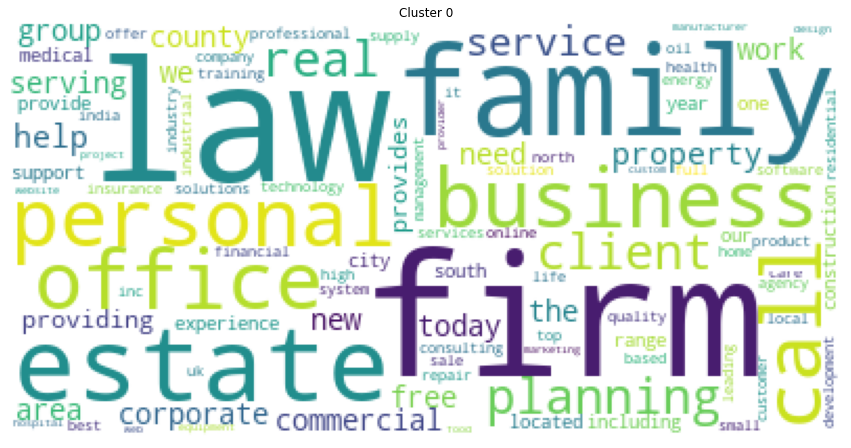

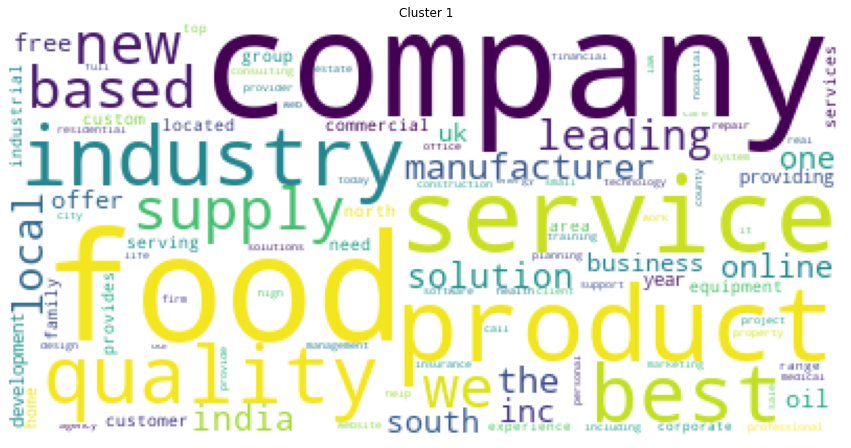

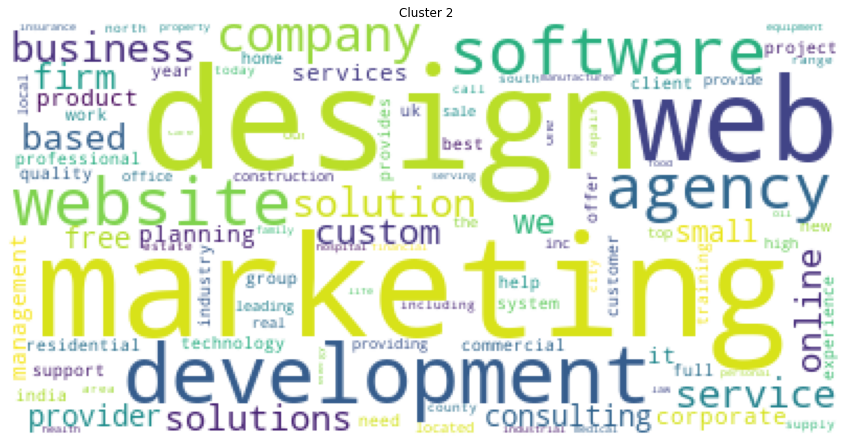

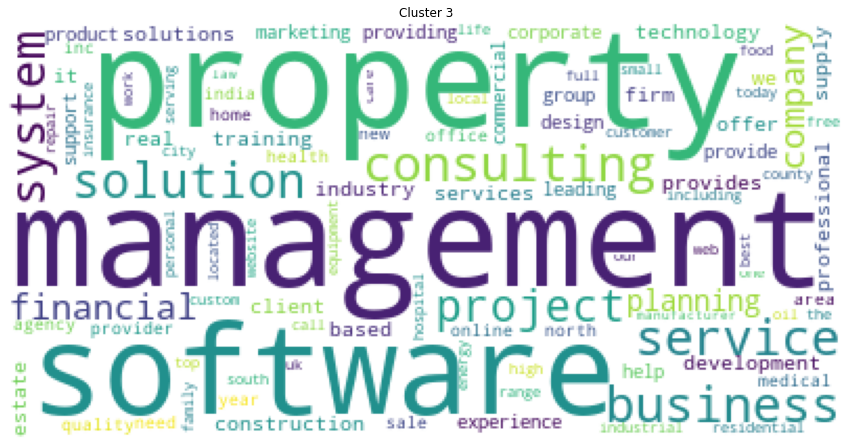

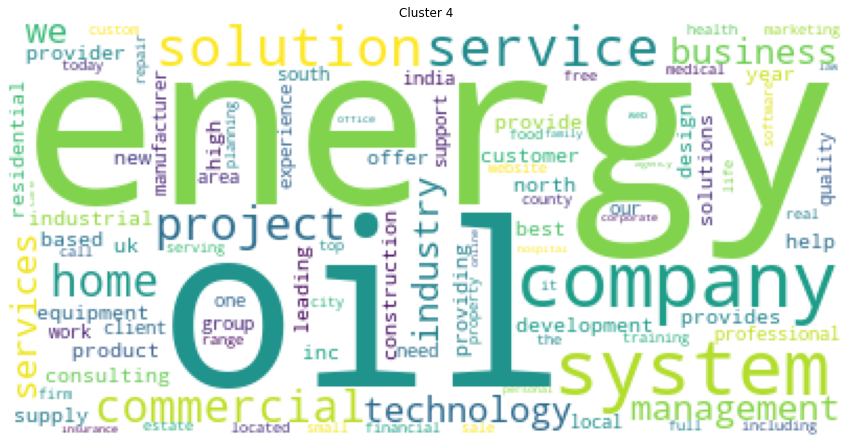

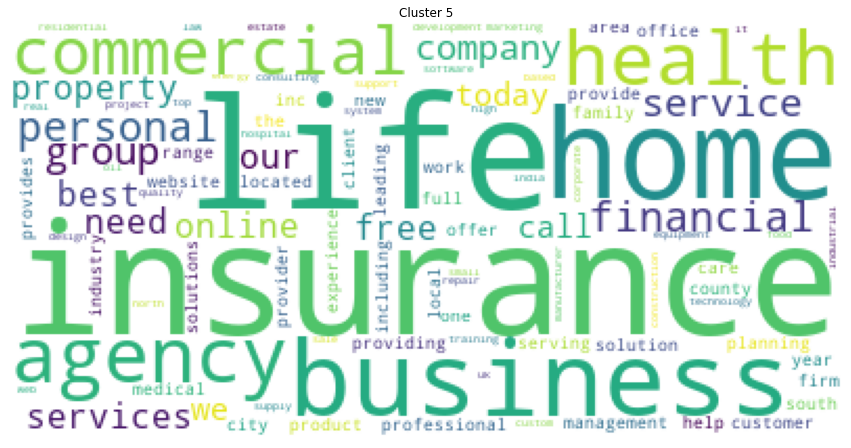

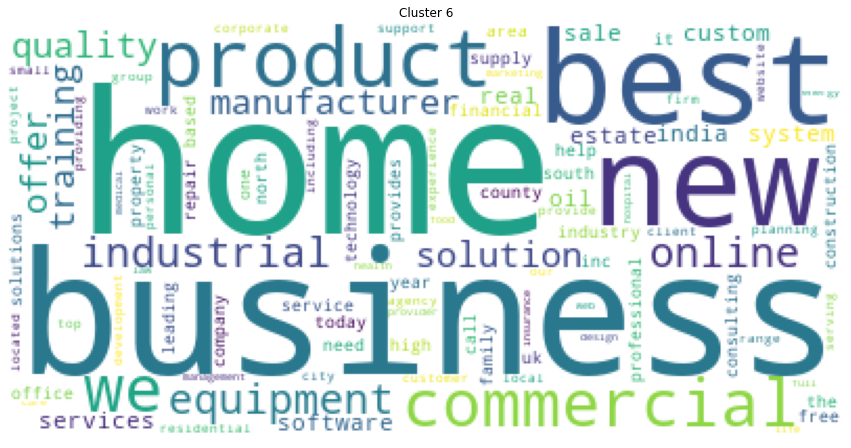

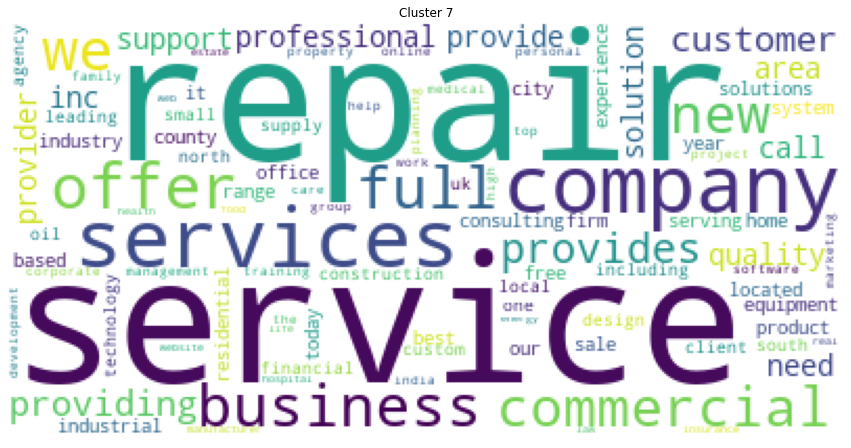

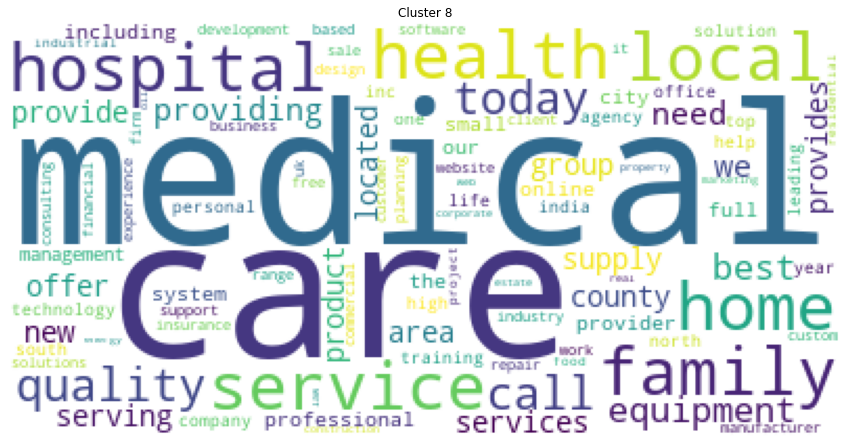

In [ ]:
order_centroids = KMean_clust.cluster_centers_.argsort()[:, ::-1]
for i in range(9):
    words = [words_list[ind] for ind in order_centroids[i, :]]
    words_ = Counter(words)
    # print("Cluster {}: {}".format(i, ' '.join(words)))
    # print(f'words in cluster {i} are {words}')
    # print(f'Length of words in cluster {i} is {len(words)}')
    
    wordcloud = WordCloud(background_color="white", max_words=100).generate_from_frequencies(words_)
    # plt.imshow(wordcloud)
    plt.figure(figsize = (15,15))
    plt.title('Cluster {}'.format(i))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

In [13]:
a = KMean_clust.labels_
mapping = {0:'Legal Services', 1:'Food Manufacturing',2:'IT Services' ,3:'Real Estate',4:'Oil and Energy',5:'Health Insurance',6:'Home Equipment Manufacturer',7:'Repair Services',8:'Medical Equipemt Manufacturer'}
a = [mapping[i] for i in a]


In [14]:
df2['Cluster'] = a

In [15]:
df2.head()

company_name  ...                        Cluster
0          bip dipietro electric inc  ...               Health Insurance
1                      elias medical  ...                Repair Services
2               koops overhead doors  ...                 Oil and Energy
5  wood green timber company limited  ...  Medical Equipemt Manufacturer
6                   houston chemical  ...  Medical Equipemt Manufacturer

[5 rows x 5 columns]

In [ ]:
words = vectorizer3.get_feature_names()
common_words = KMean_clust.cluster_centers_.argsort()[:,-1:-15:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : management, law, financial, consulting, firm, business, planning, service, software, solution, personal, services, client, family, system, company, project, help, office
1 : company, best, home, business, new, we, product, online, solution, quality, medical, offer, commercial, software, training, system, custom, oil, services
2 : property, estate, real, home, sale, management, commercial, residential, law, service, business, new, company, area, county, office, development, planning, city
3 : design, marketing, web, development, website, software, agency, company, business, service, solution, solutions, based, custom, we, management, online, firm, free
4 : service, company, repair, services, offer, commercial, we, business, new, full, provides, providing, customer, professional, area, provide, provider, quality, call
5 : energy, food, oil, company, system, product, service, industry, solution, home, project, commercial, technology, management, business, we, quality, leading, uk
6 : 

In [ ]:
cluster_0 = df2[df2.Cluster == 0]

In [ ]:
cluster_1 = df2[df2.Cluster == 1]

In [ ]:
cluster_2 = df2[df2.Cluster == 2]

In [ ]:
cluster_3 = df2[df2.Cluster == 3]

In [ ]:
cluster_4 = df2[df2.Cluster == 4]

# Example senteces in each cluster

In [ ]:
cluster_0['text'][:5]

0     electrician vero beach vero beach electrical c...
2     Koops Overhead Doors Albany Garage Doors Troy ...
9     UL Certified brake metal break metal fabricati...
41    McMurdie Electrical Portdown offer wide range ...
59    victoryfundingmortgageloanfinancingcommercialr...
Name: text, dtype: object

In [ ]:
cluster_1['text'][:5]

280    wastemanagementfacilitiesrecyclinglandfillrubb...
307    Investment Capital management Cavendish specia...
390    Burglar Alarms Dudley Commercial CCTV West Mid...
392    KEM EMS Environmental Management Systems Asbes...
446    Facilities Management Consultant ME Engineerin...
Name: text, dtype: object

In [ ]:
cluster_2['text'][:5]

84     CCTV fire alarm fire detection intrusion detec...
85     real estate tyler texas real estate east texas...
223    purdy contract building service contractor com...
480    real estate crowdfunding property investing re...
571    Mobile Banking Mortgage Commercial Real Estate...
Name: text, dtype: object

In [ ]:
cluster_3['text'][:5]

5     wood green timberWood Green London Timber Timb...
6     Chemicals Drilling Fluids EcoFriendly Environm...
8     high efficiency boilerplumbing professionalsai...
16    commercial cleaning toronto commercial cleanin...
20    Magento Varien EcommerceFranklinGriffith offer...
Name: text, dtype: object

In [ ]:
cluster_4['text'][:5]

428     solar energy solar installers near solar insta...
1294    Servo Stabilizer Servo Stabilizers Servo Stabi...
3171    brass neutral link brass neutral bar brass ear...
3810    byram lab testing measurement electrical elste...
4318    global energy metal cobalt Werner Lake Cobalt ...
Name: text, dtype: object

In [17]:
company_count_in_cluster = df2['Cluster'].value_counts()

In [18]:
df_cluster = pd.DataFrame(company_count_in_cluster)

In [19]:
df_cluster.reset_index(level=0, inplace=True)

In [20]:
df_cluster

index  Cluster
0  Medical Equipemt Manufacturer    12738
1               Health Insurance     2613
2                Repair Services     1586
3                    Real Estate     1349
4                 Legal Services     1315
5                    IT Services      919
6             Food Manufacturing      873
7    Home Equipment Manufacturer      677
8                 Oil and Energy      538

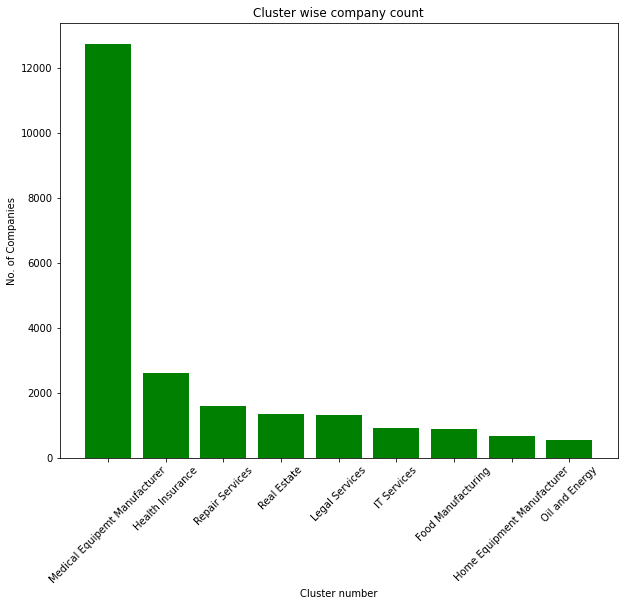

In [21]:
fig = plt.figure(figsize = (10, 8))
 
# creating the bar plot
plt.bar(df_cluster['index'],df_cluster['Cluster'], color ='Green',
        width = 0.8)
 
plt.xlabel("Cluster number")
plt.ylabel("No. of Companies")
plt.title("Cluster wise company count")
plt.xticks(rotation=45)

plt.show()